# About this notebook
### Approach for data management:

There are 3 sources of data documented below

This notebook is divided into 3 parts 
PART A - Mental Health Client-Level Data is analyzed for the years 2014 and 2019. These years are picked because the corresponding survey data for the corresponding years. In this part a summary table is created for the years 2014 and 2019 with all states and the counts aggregated for mental health cases and substance abuse. While the focus is on mental health along the way a little exploration was done to see if there was a relationship between the two. 
This part is very computationally intense so at the end of this part, a file is created. Part C uses this created file

PART B - National Mental Health Services Survey data for 2014 and 2019 is studied and a summary created by state and year regarding the number of facilities that serve mental health disorders and the number of them that serves substance abuse cases. A file is created at the end of this section with the summary that is used in Part C

PART C - The summary created in Part A and B is used, joined and further joined with population data. 
Data is plotted to understand the trends of cases between 2014 and 2019, and the number of facilities between the same years. 


## Data Source 1 - National Mental Health Services Survey (N-MHSS)
Mental Health Facilities Data

https://www.datafiles.samhsa.gov/dataset/national-mental-health-services-survey-2020-n-mhss-2020-ds0001

Codebook here: https://www.datafiles.samhsa.gov/sites/default/files/field-uploads-protected/studies/N-MHSS-2020/N-MHSS-2020-datasets/N-MHSS-2020-DS0001/N-MHSS-2020-DS0001-info/N-MHSS-2020-DS0001-info-codebook.pdf

Dataset here: https://www.datafiles.samhsa.gov/sites/default/files/field-uploads-protected/studies/N-MHSS-2020/N-MHSS-2020-datasets/N-MHSS-2020-DS0001/N-MHSS-2020-DS0001-bundles-with-study-info/N-MHSS-2020-DS0001-bndl-data-csv_v1.zip
        
Some information on this source dataset
N-MHSS is an annual survey that collects data on the services and characteristics of all known mental health treatment facilities in the 50 states, the District of Columbia, and the U.S. territories and jurisdictions. Every other year (since 2014), the survey also collects data on the number and demographics of people served in these facilities as of a specified survey reference date.

N-MHSS is the only source of national and state-level data on the mental health service delivery system reported by both public and private specialty mental health treatment facilities, including:

Public and private psychiatric hospitals
Nonfederal general hospitals with separate psychiatric units
U.S. Department of Veterans Affairs medical centers
Residential treatment centers for children and adults
Community mental health centers
Outpatient, day treatment, or partial hospitalization mental health facilities
Multi-setting (nonhospital) mental health facilities
N-MHSS complements the information collected through SAMHSA’s National Survey of Substance Abuse Treatment Services (N-SSATS). Treatment facility information from N-MHSS is used to populate the mental health component of SAMHSA’s Behavioral Health Treatment Services Locator.

## Data Source 2 - Mental Health Client-Level Data (MH-CLD) 

https://www.datafiles.samhsa.gov/dataset/mental-health-client-level-data-2019-mh-cld-2019-ds0001
    
Codebook here: https://www.datafiles.samhsa.gov/sites/default/files/field-uploads-protected/studies/MH-CLD-2019/MH-CLD-2019-datasets/MH-CLD-2019-DS0001/MH-CLD-2019-DS0001-info/MH-CLD-2019-DS0001-info-codebook.pdf
        
Dataset here: https://www.datafiles.samhsa.gov/sites/default/files/field-uploads-protected/studies/MH-CLD-2019/MH-CLD-2019-datasets/MH-CLD-2019-DS0001/MH-CLD-2019-DS0001-bundles-with-study-info/MH-CLD-2019-DS0001-bndl-data-csv_v1.zip
        
Client-Level Mental Health Data

MH-CLD and the Mental Health Treatment Episode Data Set (MH-TEDS) provide information on mental health diagnoses and the mental health treatment services, outcomes, and demographic and substance use characteristics of people in mental health treatment facilities. This information comes from facilities that report to individual state administrative data systems.    
        

## Data Source 3 - Population data

This population data is obtained to draw a relative percentage per state. 
Reference link: http://www.stats.indiana.edu/population/poptotals/historic_counts_states.asp

In [ ]:
!pip3 install pandas
!pip3 install numpy
!pip3 show pandas

## PART A - Client Level Mental Health Data Analysis

Goal:
In this section Client-Level Mental Health Data for 2 years 2019 and 2014 is used.
Using this data, exploratory analysis is done in the following areas
* Understanding the distribution of mental health disorders by type and by state
* Comparing the number of mental health cases (MHC) and substance abuse cases(SAC)

Further analysis is done to 
* Check if there is a correlation between the two
* Compare the numbers of MHC and SAC between the years 2014 and 2019.

These years are picked because I have the corresponding data for the Mental health services facilities for the same years to
do further analysis in the next part.

Approach:
Since the 2 files for 2014 and 2019 are quite large and jupyterlab environment is struggling with it, 
I trim data before merging them so I have smaller data sets to work with. (Expecting jupyterlab to cope better)

In [ ]:
%%bash
wget https://www.datafiles.samhsa.gov/sites/default/files/field-uploads-protected/studies/MH-CLD-2019/MH-CLD-2019-datasets/MH-CLD-2019-DS0001/MH-CLD-2019-DS0001-bundles-with-study-info/MH-CLD-2019-DS0001-bndl-data-csv_v1.zip
unzip MH-CLD-2019-DS0001-bndl-data-csv_v1.zip
wget https://www.datafiles.samhsa.gov/sites/default/files/field-uploads-protected/studies/MH-CLD-2014/MH-CLD-2014-datasets/MH-CLD-2014-DS0001/MH-CLD-2014-DS0001-bundles-with-study-info/MH-CLD-2014-DS0001-bndl-data-csv_1.zip
unzip MH-CLD-2014-DS0001-bndl-data-csv_1.zip


## 2019

In [7]:
import pandas as pd

## Data Access and Data Load - 2020 nmhss data load
file1 = "mhcld-puf-2019-csv.csv"
mh2019 = pd.read_csv(file1)

In [8]:
mh2019.shape

(6362044, 40)

### Remove certain rows with unknown information where
1. AGE is -9
2. GENDER is -9 
3. IJSSERVICE is 1 (served in a justince system institution)
4. MH1 is -9
5. MH2 is -9
6. MH3 is -9
7. SUB is -9
8. SMISED is -9
9. STATEFIP is 99
10. REGION is 0

In [9]:
mh2019.dtypes

YEAR           int64
AGE            int64
EDUC           int64
ETHNIC         int64
RACE           int64
GENDER         int64
SPHSERVICE     int64
CMPSERVICE     int64
OPISERVICE     int64
RTCSERVICE     int64
IJSSERVICE     int64
MH1            int64
MH2            int64
MH3            int64
SUB            int64
MARSTAT        int64
SMISED         int64
SAP            int64
EMPLOY         int64
DETNLF         int64
VETERAN        int64
LIVARAG        int64
NUMMHS         int64
TRAUSTREFLG    int64
ANXIETYFLG     int64
ADHDFLG        int64
CONDUCTFLG     int64
DELIRDEMFLG    int64
BIPOLARFLG     int64
DEPRESSFLG     int64
ODDFLG         int64
PDDFLG         int64
PERSONFLG      int64
SCHIZOFLG      int64
ALCSUBFLG      int64
OTHERDISFLG    int64
STATEFIP       int64
DIVISION       int64
REGION         int64
CASEID         int64
dtype: object

### Removing rows that having missing data that I believe is important. 
By the end of the next cell this data is cleaned

In [10]:
mh2019 = mh2019[mh2019['AGE'] != -9]
mh2019 = mh2019[mh2019['GENDER'] != -9]
mh2019 = mh2019[mh2019['IJSSERVICE'] != 1]
mh2019 = mh2019[mh2019['SMISED'] != -9]
mh2019 = mh2019[mh2019['STATEFIP'] != -99]
mh2019 = mh2019[mh2019['SMISED'] != -9]
mh2019 = mh2019[mh2019['REGION'] != 0]

### Deriving data from the MH1, MH2, MH3 (as per the code book)
If first, second, or third mental health diagnosis is 1 trauma- or stressor-related disorder, then
trauma- or stressor-related disorder flag is 1;
● if first, second, or third mental health diagnosis is 2 anxiety disorder, then anxiety disorder
flag is 1;
● if first, second, or third mental health diagnosis is 3 attention deficit/hyperactivity disorder,
then attention deficit/hyperactivity disorder flag is 1;
● if first, second, or third mental health diagnosis is 4 conduct disorder, then conduct disorder
flag is 1;
● if first, second, or third mental health diagnosis is 5 delirium/dementia disorder, then
delirium/dementia disorder flag is 1;
● if first, second, or third mental health diagnosis is 6 bipolar disorder, then bipolar disorder
flag is 1;
● if first, second, or third mental health diagnosis is 7 depressive disorder, then depressive
disorder flag is 1;
● if first, second, or third mental health diagnosis is 8 oppositional defiant disorder, then
oppositional defiant disorder flag is 1;
● if first, second, or third mental health diagnosis is 9 pervasive developmental disorder, then
pervasive developmental disorder flag is 1;
● if first, second, or third mental health diagnosis is 10 personality disorder, then personality
disorder flag is 1;
● if first, second, or third mental health diagnosis is 11 schizophrenia or other psychotic
disorder, then schizophrenia or other psychotic disorder flag is 1;
● if first, second, or third mental health diagnosis is 12 alcohol or substance use disorder, then
alcohol or substance use disorder flag is 1;
● if first, second, or third mental health diagnosis is 13 other mental disorder, then other mental
disorder flag is 1.

This section defines a "disorder" function and applies it to all rows. The MH1, MH2, MH3 are used to create a 
verdict on the disorder. 


In [11]:
def disorder(vals):
    """Series -> float
    vals is a Pandas series with 3 values
    MH1, MH2, MH3 
    The 3 values are used to created the 
    Condition as per the code book guidelines above"""
    mh1 = vals.MH1
    mh2 = vals.MH2
    mh3 = vals.MH3
    if (mh1 == 13) or (mh2 == 13) or (mh3 == 13):
        return "OTHER"
    if (mh1 == 12) or (mh2 == 12) or (mh3 == 12):
        return "SA" # Substrance Abuse
    if (mh1 == 11) or (mh2 == 11) or (mh3 == 11):
        return "PSYCH" # Psychotic or Schizophrenia
    if (mh1 == 10) or (mh2 == 10) or (mh3 == 10):
        return "PERSONALITY" # Psychotic or Schizophrenia
    if (mh1 == 9) or (mh2 == 9) or (mh3 == 9):
        return "PERVASIVE" # Pervasive Development  
    if (mh1 == 8) or (mh2 == 8) or (mh3 == 8):
        return "OPPOSITIONAL" # Oppositional Defiant 
    if (mh1 == 7) or (mh2 == 7) or (mh3 == 7):
        return "DEPRESSIVE" # Depressive
    if (mh1 == 6) or (mh2 == 6) or (mh3 == 6):
        return "BIPOLAR" # Bipolar
    if (mh1 == 5) or (mh2 == 5) or (mh3 == 5):
        return "DEL/DEM" # Delerium, Dementia
    if (mh1 == 4) or (mh2 == 4) or (mh3 == 4):
        return "CONDUCT" # Conduct
    if (mh1 == 3) or (mh2 == 3) or (mh3 == 3):
        return "ADHD" # ADHD
    if (mh1 == 2) or (mh2 == 2) or (mh3 == 2):
        return "ANXIETY" 
    if (mh1 == 1) or (mh2 == 1) or (mh3 == 1):
        return "TRAUMA"
    return "None"

def anydisorder(vals):
    """Series -> float
    vals is a Pandas series with 1 values
    Disorder
    """
    disorder = vals.Disorder
    if disorder == "None":
        return 'No'
    else:
        return 'Yes'

In [12]:
mh2019['Disorder'] = mh2019[['MH1', 'MH2', 'MH3']].apply(disorder, axis=1)
mh2019['Disorder'].value_counts()
mh2019['AnyDisorder'] = mh2019[['Disorder']].apply(anydisorder, axis=1)

In [13]:
### Deriving data for SUBSTANCE Abuse Information
substancetable = {
  1: "ALCOHOL_IND",
  2: "ALCOHOL_INTOX",
  3: "SUB_IND",
  4: "ALCOHOL_DEP",
  5: "COCAINE_DEP",
  6: "CANNABIS_DEP",
  7: "OPIOID_DEP",
  8: "OTHER",
  9: "ALCOHOL_ABUSE",
  10: "COCAINE_ABUSE",
  11: "CANNABIS_ABUSE",
  12: "OPIOID_ABUSE",
  13: "OTHER_RELATED",
  -9: "None"
}

def substancelookup(vals):
    """Series -> float
    vals is a Pandas series with 1 values
    SUB"""
    sub = vals.SUB
    return substancetable[sub]

def anysubstance(vals):
    """Series -> float
    vals is a Pandas series with 1 values
    SUB"""
    sub = vals.SUB
    if (sub == -9):
        return 'No'
    else:
        return 'Yes'


In [14]:
mh2019['SubstanceAbuse'] = mh2019[['SUB']].apply(substancelookup, axis=1)
mh2019['AnySubstance'] = mh2019[['SUB']].apply(anysubstance, axis=1)

### Have a more readable form of "STATEFIP"

In [15]:
import states
mh2019['State'] = mh2019[['STATEFIP']].apply(states.statelookupbycode, axis=1)

### Columns that are not interesting anymore are dropped in this section to have a relevant data frame
1. MH1, MH2,MH3  (Given the newly created "Disorder" Column)
2. MARITALSTATUS 

In [16]:
columnstodrop = ['MARSTAT', 'MH1', 'MH2', 'MH3']
mh2019 = mh2019.drop(['MARSTAT', 'MH1', 'MH2', 'MH3'], axis=1)

In [17]:
mh2019.shape

(5892510, 41)

### Lets study the disorder occurance per state in a few  aspects
1. AnyDisorder per State
2. Type of Disorder in the state with the highest number of disorders
3. Any substance per State
4. Type of substance abuse in the state with the highest number of substance abuse cases

In [18]:
summary2019_bothsummary = mh2019[['YEAR','State', 'AnyDisorder', 'Disorder', 'AnySubstance']]
summary2019_bothsummary.to_csv('summary2019_anyDisSub.csv')

In [19]:
summary2019_perdisrodersummary = mh2019[['YEAR','State', 'AnyDisorder', 'Disorder', 'AnySubstance']]
summary2019_perdisrodersummary = summary2019_perdisrodersummary.groupby(['YEAR', 'State', 'Disorder']).agg(perDisorderCount = ('Disorder', 'count')).reset_index()
summary2019_perdisrodersummary.to_csv('summary2019_perdisorder.csv')
summary2019_perdisrodersummary

,YEAR,State,Disorder,perDisorderCount
0,2019,Alabama,ADHD,8080
1,2019,Alabama,ANXIETY,4402
2,2019,Alabama,BIPOLAR,8510
3,2019,Alabama,CONDUCT,1021
4,2019,Alabama,DEL/DEM,244
...,...,...,...,...
594,2019,Wyoming,OTHER,1963
595,2019,Wyoming,PERSONALITY,513
596,2019,Wyoming,PERVASIVE,206
597,2019,Wyoming,PSYCH,947


In [20]:
summary2019_disorder = summary2019_bothsummary.groupby(['YEAR','State', 'AnyDisorder']).agg(disorderCount = ('AnyDisorder', 'count')).reset_index()
summary2019_disorder.to_csv('summary2019_disorder.csv')
summary2019_disorder

,YEAR,State,AnyDisorder,disorderCount
0,2019,Alabama,No,162
1,2019,Alabama,Yes,95632
2,2019,Alaska,No,232
3,2019,Alaska,Yes,10780
4,2019,Arkansas,No,15994
...,...,...,...,...
82,2019,Washington,Yes,189913
83,2019,Wisconsin,No,7737
84,2019,Wisconsin,Yes,66500
85,2019,Wyoming,No,435


In [21]:
summary2019_substance = summary2019_bothsummary[['YEAR','State', 'AnySubstance']]
summary2019_substance = summary2019_substance.groupby(['YEAR','State', 'AnySubstance']).agg(substanceCount = ('AnySubstance', 'count')).reset_index()
summary2019_substance.to_csv('summary2019_anysubstance.csv')

summary2019_substance

,YEAR,State,AnySubstance,substanceCount
0,2019,Alabama,No,85443
1,2019,Alabama,Yes,10351
2,2019,Alaska,No,10251
3,2019,Alaska,Yes,761
4,2019,Arkansas,No,73926
...,...,...,...,...
82,2019,Washington,Yes,57
83,2019,Wisconsin,No,69384
84,2019,Wisconsin,Yes,4853
85,2019,Wyoming,No,16270


In [22]:
summary2019_disorder

,YEAR,State,AnyDisorder,disorderCount
0,2019,Alabama,No,162
1,2019,Alabama,Yes,95632
2,2019,Alaska,No,232
3,2019,Alaska,Yes,10780
4,2019,Arkansas,No,15994
...,...,...,...,...
82,2019,Washington,Yes,189913
83,2019,Wisconsin,No,7737
84,2019,Wisconsin,Yes,66500
85,2019,Wyoming,No,435


[Text(0, 0, 'Alabama'),
 Text(1, 0, 'Alaska'),
 Text(2, 0, 'Arkansas'),
 Text(3, 0, 'California'),
 Text(4, 0, 'Colorado'),
 Text(5, 0, 'Connecticut'),
 Text(6, 0, 'Delaware'),
 Text(7, 0, 'District of Columbia'),
 Text(8, 0, 'Florida'),
 Text(9, 0, 'Hawaii'),
 Text(10, 0, 'Idaho'),
 Text(11, 0, 'Illinois'),
 Text(12, 0, 'Indiana'),
 Text(13, 0, 'Kentucky'),
 Text(14, 0, 'Louisiana'),
 Text(15, 0, 'Maryland'),
 Text(16, 0, 'Massachusetts'),
 Text(17, 0, 'Michigan'),
 Text(18, 0, 'Minnesota'),
 Text(19, 0, 'Mississippi'),
 Text(20, 0, 'Missouri'),
 Text(21, 0, 'Montana'),
 Text(22, 0, 'Nebraska'),
 Text(23, 0, 'Nevada'),
 Text(24, 0, 'New Jersey'),
 Text(25, 0, 'New Mexico'),
 Text(26, 0, 'New York'),
 Text(27, 0, 'North Carolina'),
 Text(28, 0, 'North Dakota'),
 Text(29, 0, 'Ohio'),
 Text(30, 0, 'Oklahoma'),
 Text(31, 0, 'Oregon'),
 Text(32, 0, 'Pennsylvania'),
 Text(33, 0, 'Rhode Island'),
 Text(34, 0, 'South Carolina'),
 Text(35, 0, 'South Dakota'),
 Text(36, 0, 'Tennessee'),
 Text(3

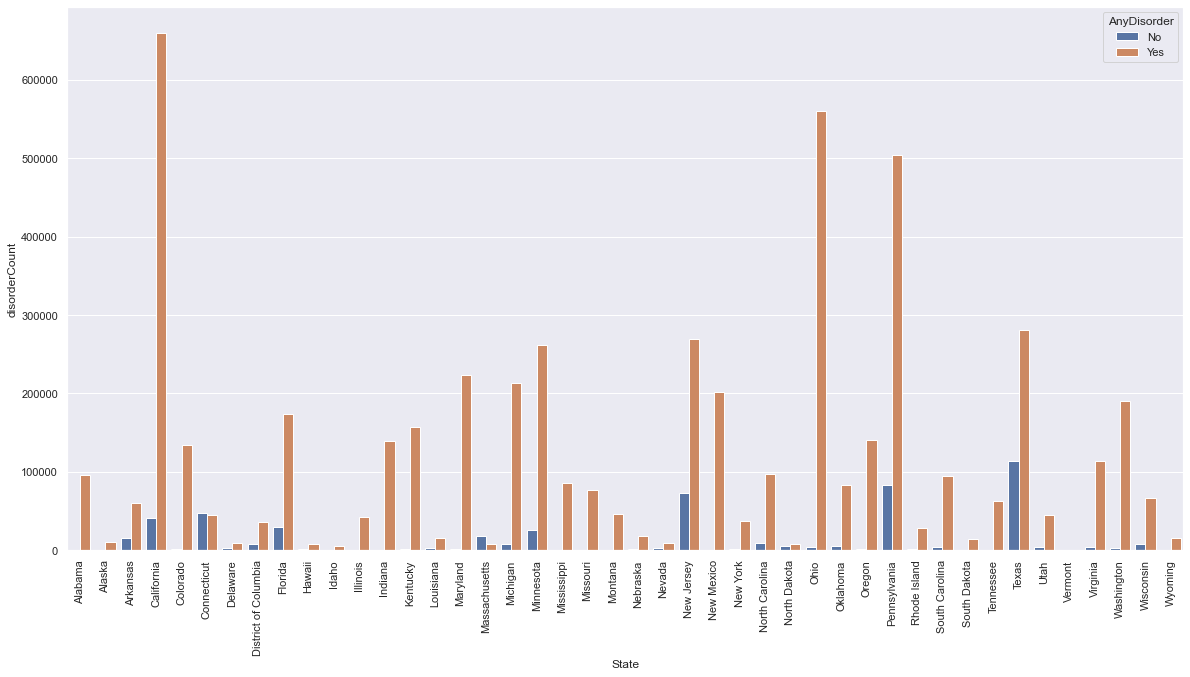

In [23]:
# import libraries
import seaborn as sns
import matplotlib.pyplot as plt

# set plot style: grey grid in the background:
sns.set(style="darkgrid")

# Set the figure size
plt.figure(figsize=(20, 10))

ax = sns.barplot(x = "State", y = "disorderCount", hue = "AnyDisorder", data =summary2019_disorder)

ax.set_xticklabels(ax.get_xticklabels(), rotation = 90)


[Text(0, 0, 'Alabama'),
 Text(1, 0, 'Alaska'),
 Text(2, 0, 'Arkansas'),
 Text(3, 0, 'California'),
 Text(4, 0, 'Colorado'),
 Text(5, 0, 'Connecticut'),
 Text(6, 0, 'Delaware'),
 Text(7, 0, 'District of Columbia'),
 Text(8, 0, 'Florida'),
 Text(9, 0, 'Hawaii'),
 Text(10, 0, 'Idaho'),
 Text(11, 0, 'Illinois'),
 Text(12, 0, 'Indiana'),
 Text(13, 0, 'Kentucky'),
 Text(14, 0, 'Louisiana'),
 Text(15, 0, 'Maryland'),
 Text(16, 0, 'Massachusetts'),
 Text(17, 0, 'Michigan'),
 Text(18, 0, 'Minnesota'),
 Text(19, 0, 'Mississippi'),
 Text(20, 0, 'Missouri'),
 Text(21, 0, 'Montana'),
 Text(22, 0, 'Nebraska'),
 Text(23, 0, 'Nevada'),
 Text(24, 0, 'New Jersey'),
 Text(25, 0, 'New Mexico'),
 Text(26, 0, 'New York'),
 Text(27, 0, 'North Carolina'),
 Text(28, 0, 'North Dakota'),
 Text(29, 0, 'Ohio'),
 Text(30, 0, 'Oklahoma'),
 Text(31, 0, 'Oregon'),
 Text(32, 0, 'Pennsylvania'),
 Text(33, 0, 'Rhode Island'),
 Text(34, 0, 'South Carolina'),
 Text(35, 0, 'South Dakota'),
 Text(36, 0, 'Tennessee'),
 Text(3

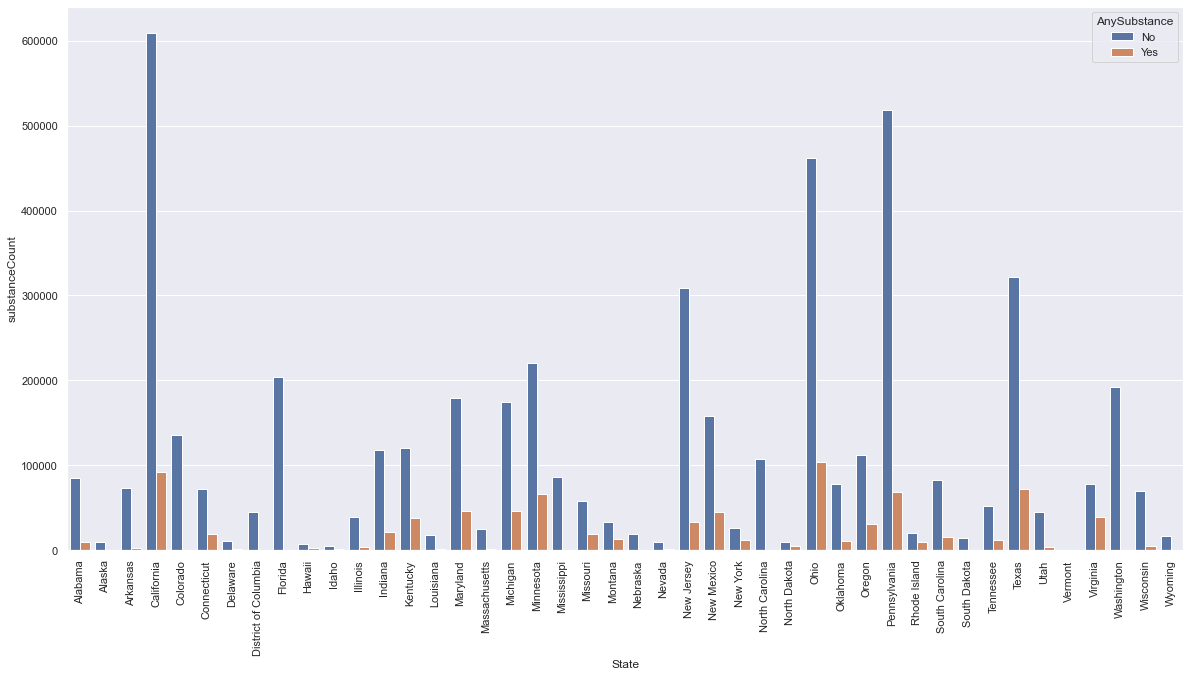

In [24]:
# import libraries
import seaborn as sns
import matplotlib.pyplot as plt

# set plot style: grey grid in the background:
sns.set(style="darkgrid")

# Set the figure size
plt.figure(figsize=(20, 10))

# grouped barplot
#ax.set(ylim=(0, 100))
ax = sns.barplot(x = "State", y = "substanceCount", hue = "AnySubstance", data =summary2019_substance)

ax.set_xticklabels(ax.get_xticklabels(), rotation = 90)


### Check if there is any correlation between the substance abuse and mental health  when both are marked as yes.

For this purpose create one table with Any Disorder and SubstanceAbuse 
Eliminate rows with no substance or mental health issues

*sumary2019* is the summary of number of cases of substance abuse and mental health disorder cases

In [25]:
summary2019 = summary2019_substance.merge(summary2019_disorder, how = "inner", left_on = ["State", 'YEAR'], right_on = ["State", 'YEAR'])

summary2019 = summary2019[summary2019['AnyDisorder']=="Yes"]
summary2019 = summary2019[summary2019['AnySubstance']=="Yes"]
summary2019.drop(['AnyDisorder','AnySubstance'], axis=1, inplace=True)
summary2019.to_csv('summary2019_cases.csv')
summary2019


,YEAR,State,substanceCount,disorderCount
3,2019,Alabama,10351,95632
7,2019,Alaska,761,10780
11,2019,Arkansas,2122,60054
15,2019,California,91626,660144
19,2019,Colorado,566,134658
23,2019,Connecticut,19657,45096
27,2019,Delaware,2090,9878
31,2019,District of Columbia,8,36528
35,2019,Florida,224,174302
39,2019,Hawaii,2454,8487


Lets see if there is any correlation betwee the substance abuse count and the mental health disorder count

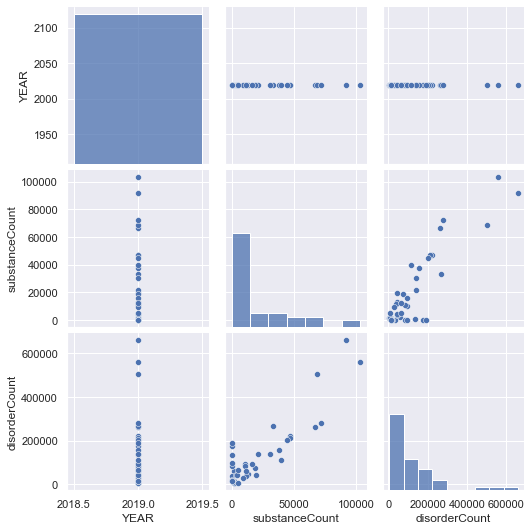

In [26]:
import seaborn as sns
sns.pairplot(summary2019)

Looking at the plot of disorderCount vs the susbtanceCount (bottom-middle and middle-right), there seems to be a positive correlation between the 2 variables. Statistical significance is to be determined but a correlation appears visually.

### In this section we curate, clean and create a summary just like we have done for 2019, but for the year 2014

## 2014

In [3]:
import pandas as pd
import states
file = "mhcld-puf-2014-csv.csv"
mh2014 = pd.read_csv(file)
mh2014 = mh2014[mh2014['AGE'] != -9]
mh2014 = mh2014[mh2014['GENDER'] != -9]
mh2014 = mh2014[mh2014['IJSSERVICE'] != 1]
mh2014 = mh2014[mh2014['SMISED'] != -9]
mh2014 = mh2014[mh2014['STATEFIP'] != -99]
mh2014 = mh2014[mh2014['SMISED'] != -9]
mh2014 = mh2014[mh2014['REGION'] != 0]

mh2014['Disorder'] = mh2014[['MH1', 'MH2', 'MH3']].apply(disorder, axis=1)
mh2014['Disorder'].value_counts()
mh2014['AnyDisorder'] = mh2014[['Disorder']].apply(anydisorder, axis=1)

mh2014['SubstanceAbuse'] = mh2014[['SUB']].apply(substancelookup, axis=1)
mh2014['AnySubstance'] = mh2014[['SUB']].apply(anysubstance, axis=1)

mh2014['State'] = mh2014[['STATEFIP']].apply(states.statelookupbycode, axis=1)

columnstodrop = ['MARSTAT', 'MH1', 'MH2', 'MH3']
mh2014 = mh2014.drop(['MARSTAT', 'MH1', 'MH2', 'MH3'], axis=1)

mh2014.head()

,YEAR,AGE,EDUC,ETHNIC,RACE,GENDER,SPHSERVICE,CMPSERVICE,OPISERVICE,RTCSERVICE,...,OTHERDISFLG,STATEFIP,DIVISION,REGION,CASEID,Disorder,AnyDisorder,SubstanceAbuse,AnySubstance,State
1,2014,12,5,4,-9,1,1,1,2,2,...,0,1,6,3,20140000002,PSYCH,Yes,None,No,Alabama
2,2014,8,4,-9,6,1,2,1,2,2,...,0,1,6,3,20140000003,PSYCH,Yes,None,No,Alabama
4,2014,6,-9,3,-9,1,1,1,2,2,...,0,1,6,3,20140000005,PERSONALITY,Yes,None,No,Alabama
5,2014,14,-9,4,-9,2,1,1,2,2,...,0,1,6,3,20140000006,PSYCH,Yes,None,No,Alabama
6,2014,8,-9,-9,-9,2,1,2,2,2,...,0,1,6,3,20140000007,PERSONALITY,Yes,None,No,Alabama


In [4]:
mh2014['State'] = mh2014[['STATEFIP']].apply(states.statelookupbycode, axis=1)

mh2014.columns


Index(['YEAR', 'AGE', 'EDUC', 'ETHNIC', 'RACE', 'GENDER', 'SPHSERVICE',
       'CMPSERVICE', 'OPISERVICE', 'RTCSERVICE', 'IJSSERVICE', 'SUB', 'SMISED',
       'SAP', 'EMPLOY', 'DETNLF', 'VETERAN', 'LIVARAG', 'NUMMHS',
       'TRAUSTREFLG', 'ANXIETYFLG', 'ADHDFLG', 'CONDUCTFLG', 'DELIRDEMFLG',
       'BIPOLARFLG', 'DEPRESSFLG', 'ODDFLG', 'PDDFLG', 'PERSONFLG',
       'SCHIZOFLG', 'ALCSUBFLG', 'OTHERDISFLG', 'STATEFIP', 'DIVISION',
       'REGION', 'CASEID', 'Disorder', 'AnyDisorder', 'SubstanceAbuse',
       'AnySubstance', 'State'],
      dtype='object')

In [5]:

summary2014_bothsummary = mh2014[['YEAR','State', 'AnyDisorder', 'Disorder', 'AnySubstance']]
summary2014_bothsummary.to_csv('summary2014_anyDisSub.csv')

summary2014_perdisrodersummary = mh2014[['YEAR','State', 'AnyDisorder', 'Disorder', 'AnySubstance']]
summary2014_perdisrodersummary = summary2014_perdisrodersummary.groupby(['YEAR', 'State', 'Disorder']).agg(perDisorderCount = ('Disorder', 'count')).reset_index()
summary2014_perdisrodersummary.to_csv('summary2014_perdisorder.csv')

summary2014_disorder = summary2014_bothsummary.groupby(['YEAR','State', 'AnyDisorder']).agg(disorderCount = ('AnyDisorder', 'count')).reset_index()
summary2014_disorder.to_csv('summary2014_disorder.csv')

summary2014_substance = summary2014_bothsummary[['YEAR','State', 'AnySubstance']]
summary2014_substance = summary2014_substance.groupby(['YEAR','State', 'AnySubstance']).agg(substanceCount = ('AnySubstance', 'count')).reset_index()
summary2014_substance.to_csv('summary2014_anysubstance.csv')


summary2014 = summary2014_substance.merge(summary2014_disorder, how = "inner", left_on = ["State", 'YEAR'], right_on = ["State", 'YEAR'])

summary2014 = summary2014[summary2014['AnyDisorder']=="Yes"]
summary2014 = summary2014[summary2014['AnySubstance']=="Yes"]
summary2014.drop(['AnyDisorder','AnySubstance'], axis=1, inplace=True)
summary2014.to_csv('summary2014_cases.csv')
summary2014

,YEAR,State,substanceCount,disorderCount
3,2014,Alabama,8723,86084
7,2014,Arizona,34362,153631
11,2014,Arkansas,3085,63711
15,2014,California,116172,646664
19,2014,Colorado,16084,112996
23,2014,Connecticut,18539,76758
27,2014,Delaware,426,8988
31,2014,District of Columbia,11,22886
35,2014,Florida,25161,156836
39,2014,Hawaii,1371,11486


We now merge the 2 summarys for years 2014 and 2019.

In [28]:
dataframes = []
dataframes.append(summary2014)
dataframes.append(summary2019)
summary_2014_2019 = pd.concat(dataframes)
summary_2014_2019.head()
summary_2014_2019.to_csv('summary_2014_2019_cases.csv')

## Conclustion of Part A
In this Part we did the following
a. Downloaded the Client Level Mental Health Data for 2 years 2014 and 2019. 
b. Cleaned the data to summarize the counts of mental health disorders and susbtance abuse cases
c. Merged the data from 2014 and 2019 to create 1 summary
d. Going forward because this part is very computationally intensive, I will be using the summaries saved in files created as part of this section for further analysis
i.e. sumary_2014_2019_cases.csv 

## Part B  - National Mental Health Services Survey (N-MHSS)
Mental Health Facilities Data

https://www.datafiles.samhsa.gov/dataset/national-mental-health-services-survey-2020-n-mhss-2020-ds0001

Codebook here: https://www.datafiles.samhsa.gov/sites/default/files/field-uploads-protected/studies/N-MHSS-2020/N-MHSS-2020-datasets/N-MHSS-2020-DS0001/N-MHSS-2020-DS0001-info/N-MHSS-2020-DS0001-info-codebook.pdf

Dataset here: https://www.datafiles.samhsa.gov/sites/default/files/field-uploads-protected/studies/N-MHSS-2020/N-MHSS-2020-datasets/N-MHSS-2020-DS0001/N-MHSS-2020-DS0001-bundles-with-study-info/N-MHSS-2020-DS0001-bndl-data-csv_v1.zip

Some information on this source dataset N-MHSS is an annual survey that collects data on the services and characteristics of all known mental health treatment facilities in the 50 states, the District of Columbia, and the U.S. territories and jurisdictions. Every other year (since 2014), the survey also collects data on the number and demographics of people served in these facilities as of a specified survey reference date.

N-MHSS is the only source of national and state-level data on the mental health service delivery system reported by both public and private specialty mental health treatment facilities, including:

Public and private psychiatric hospitals Nonfederal general hospitals with separate psychiatric units U.S. Department of Veterans Affairs medical centers Residential treatment centers for children and adults Community mental health centers Outpatient, day treatment, or partial hospitalization mental health facilities Multi-setting (nonhospital) mental health facilities N-MHSS complements the information collected through SAMHSA’s National Survey of Substance Abuse Treatment Services (N-SSATS). Treatment facility information from N-MHSS is used to populate the mental health component of SAMHSA’s Behavioral Health Treatment Services Locator.

In this section 
Goal: 
Summarize the following for years 2014 and 2019
a. Number of total facilities per state
b. Number of facilities per state that partake in mental health improvement
c. Number of facilities per state that partake in substance abuse treatment
d. Compare a-c for years 2019 and 2014.    disorders as well as substance abuse. 

In [ ]:
%%bash
wget https://www.datafiles.samhsa.gov/sites/default/files/field-uploads-protected/studies/N-MHSS-2019/N-MHSS-2019-datasets/N-MHSS-2019-DS0001/N-MHSS-2019-DS0001-bundles-with-study-info/N-MHSS-2019-DS0001-bndl-data-tsv.zip
unzip N-MHSS-2019-DS0001-bndl-data-tsv.zip


In [92]:
import pandas as pd
file = "nmhss-puf-2019-csv.csv"
nm = pd.read_csv(file)
nm.head()

,CASEID,LST,MHINTAKE,MHDIAGEVAL,MHREFERRAL,SMISEDSUD,TREATMT,ADMINSERV,SETTINGIP,SETTINGRC,...,LICENMH,LICENSED,LICENPH,LICENSEDFCS,LICENHOS,JCAHO,CARF,COA,CMS,OTHSTATE
0,201900001,AK,1,1,1,1,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1,201900002,AK,1,1,1,1,1,1,0,0,...,0,0,0,0,0,1,0,0,0,0
2,201900003,AK,1,1,1,1,1,0,0,0,...,1,1,1,0,0,1,0,0,1,0
3,201900004,AK,1,1,1,1,1,0,0,0,...,1,1,1,0,0,1,0,0,1,0
4,201900005,AK,1,1,1,1,1,1,0,0,...,1,0,0,0,0,0,0,1,1,0


### Since the goal is to summarize the below, we're picking only a few columns
-Number of total facilities per state

-Number of facilities per state that partake in mental health improvement

-Number of facilities per state that partake in substance abuse treatment

In [93]:
nm = nm[[
    'LST',
    'TREATMT',
    'SETTINGIP',
    'SETTINGRC',
    'SETTINGDTPH',
    'SETTINGOP',
    'FACILITYTYPE',
    'FOCUS',
    'MHINTAKE',
    'MHDIAGEVAL',
    'MHREFERRAL',
    'SRVC31'
]]

### Data filtering and derived data
1. Created a derived column "MentalHealthAssistance" <- (if any of the colums  
   SETTINGIP, SETTINGRC, SETTINGDTPH, FOCUS = 1 or 3 , MHHINTAKE, MHDIAGEVAL, MHREFERRAL is set to 1
2. 'TREATMENT' column already indicates those facilities treating substance abuse

In [94]:
def label_mha (row):
    """row -> Dataframe row 
    row is a an entire row from the dataframe"""
    if (row['SETTINGIP'] == 1) or \
       (row['SETTINGRC'] == 1) or \
       (row['SETTINGDTPH'] == 1) or \
       (row['FOCUS'] == 1) or \
       (row['FOCUS'] == 3) or \
       (row['MHINTAKE'] == 1) or \
       (row['MHDIAGEVAL'] == 1) or \
       (row['MHREFERRAL'] == 1):
        return int(1)
    else:
        return 0

In [95]:
nm['MentalHealthAssistance'] = nm.apply (lambda row: label_mha(row), axis=1)
nm['MentalHealthAssistance']= nm['MentalHealthAssistance'].astype(int)

nm['SubstanceAbuseAssistance']= nm['TREATMT'].astype(int)
nm.head()

,LST,TREATMT,SETTINGIP,SETTINGRC,SETTINGDTPH,SETTINGOP,FACILITYTYPE,FOCUS,MHINTAKE,MHDIAGEVAL,MHREFERRAL,SRVC31,MentalHealthAssistance,SubstanceAbuseAssistance
0,AK,1,0,0,0,1,7,3,1,1,1,1,1,1
1,AK,1,0,0,0,1,7,3,1,1,1,1,1,1
2,AK,1,0,0,0,1,9,3,1,1,1,1,1,1
3,AK,1,0,0,0,1,10,4,1,1,1,0,1,1
4,AK,1,0,0,0,1,7,1,1,1,1,1,1,1


### Grouping and Aggregating
1. Group by state and count the number of mentalhealth and substance abuse assistance 

In [96]:
summary_mh = nm[['LST', 'MentalHealthAssistance', 'SubstanceAbuseAssistance']]
summary_mh = summary_mh.groupby(['LST', 'MentalHealthAssistance']).agg(mhCount = ('MentalHealthAssistance', 'count')).reset_index()
summary_mh

,LST,MentalHealthAssistance,mhCount
0,AK,1,93
1,AL,1,180
2,AR,1,202
3,AZ,1,421
4,CA,1,952
5,CO,1,190
6,CT,1,230
7,DC,1,39
8,DE,1,36
9,FL,1,520


In [97]:
import numpy as np
summary_sa = nm[['LST', 'MentalHealthAssistance', 'SubstanceAbuseAssistance']]
summary_sa = summary_sa.groupby(['LST', 'SubstanceAbuseAssistance']).agg(saCount = ('SubstanceAbuseAssistance', 'count')).reset_index()
summary_sa["SubstanceAbuseAssistance"] = np.where(summary_sa["SubstanceAbuseAssistance"] == 1, "Yes", "No")
summary_sa

,LST,SubstanceAbuseAssistance,saCount
0,AK,No,31
1,AK,Yes,62
2,AL,No,113
3,AL,Yes,67
4,AR,No,112
...,...,...,...
101,WV,Yes,96
102,WY,No,7
103,WY,Yes,38
104,ZZ,No,2


### Final data transformation for the summary
1. Group by state and count the number of mentalhealth and substance abuse assistance 
2. Further Merge the 2 summary tables for mental health and substance abuse

In [98]:
import numpy as np
#summary_sa["SubstanceAbuseAssistance"] = np.where(summary_sa["SubstanceAbuseAssistance"] == 1, "Y", "N")
summary_mh["MentalHealthAssistance"] = np.where(summary_mh["MentalHealthAssistance"] == 1, "Yes", "No")

summary2019 = summary_mh.merge(summary_sa, how = "inner", left_on = "LST", right_on = "LST")
summary2019['State'] = summary2019[['LST']].apply(states.statelookupbyabbr, axis=1)

# Lets only keep rows for facilities that serve Substance Abuse and Mental Health patients
summary2019 = summary2019[summary2019['MentalHealthAssistance']=="Yes"]
summary2019 = summary2019[summary2019['SubstanceAbuseAssistance']=="Yes"]

summary2019.rename(columns = {'mhCount': 'MentalHealthFacCnt', 
                              'saCount': 'SubstanceAbuseFacCnt'},
                               inplace = True)
summary2019['YEAR'] = '2019'
len(summary2019['State'].unique())

53

In [99]:
summary2019.drop(['LST', 'MentalHealthAssistance', 'SubstanceAbuseAssistance'],  axis = 1, inplace = True)
summary2019


,MentalHealthFacCnt,SubstanceAbuseFacCnt,State,YEAR
1,93,62,Alaska,2019
3,180,67,Alabama,2019
5,202,90,Arkansas,2019
7,421,312,Arizona,2019
9,952,444,California,2019
11,190,132,Colorado,2019
13,230,160,Connecticut,2019
15,39,16,District of Columbia,2019
17,36,29,Delaware,2019
19,520,310,Florida,2019


Now we did the above for year 2019, we do the same thing for 2014

In [100]:
%%bash
wget https://www.datafiles.samhsa.gov/sites/default/files/field-uploads-protected/studies/N-MHSS-2014/N-MHSS-2014-datasets/N-MHSS-2014-DS0001/N-MHSS-2014-DS0001-bundles-with-study-info/N-MHSS-2014-DS0001-bndl-data-tsv.zip
unzip N-MHSS-2014-DS0001-bndl-data-tsv.zip

--2022-05-15 09:59:51--  https://www.datafiles.samhsa.gov/sites/default/files/field-uploads-protected/studies/N-MHSS-2014/N-MHSS-2014-datasets/N-MHSS-2014-DS0001/N-MHSS-2014-DS0001-bundles-with-study-info/N-MHSS-2014-DS0001-bndl-data-tsv.zip
Resolving www.datafiles.samhsa.gov (www.datafiles.samhsa.gov)... 3.214.5.147, 75.101.214.125
Connecting to www.datafiles.samhsa.gov (www.datafiles.samhsa.gov)|3.214.5.147|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3614130 (3.4M) [application/zip]
Saving to: 'N-MHSS-2014-DS0001-bndl-data-tsv.zip.2'

     0K .......... .......... .......... .......... ..........  1% 1.06M 3s
    50K .......... .......... .......... .......... ..........  2%  952K 3s
   100K .......... .......... .......... .......... ..........  4% 96.7M 2s
   150K .......... .......... .......... .......... ..........  5%  993K 2s
   200K .......... .......... .......... .......... ..........  7%  124M 2s
   250K .......... .......... .......... ......

Archive:  N-MHSS-2014-DS0001-bndl-data-tsv.zip


replace N-MHSS-2014-DS0001-info/N-MHSS-2014-info-description.pdf? [y]es, [n]o, [A]ll, [N]one, [r]ename:  NULL
(EOF or read error, treating as "[N]one" ...)


CalledProcessError: Command 'b'wget https://www.datafiles.samhsa.gov/sites/default/files/field-uploads-protected/studies/N-MHSS-2014/N-MHSS-2014-datasets/N-MHSS-2014-DS0001/N-MHSS-2014-DS0001-bundles-with-study-info/N-MHSS-2014-DS0001-bndl-data-tsv.zip\nunzip N-MHSS-2014-DS0001-bndl-data-tsv.zip\n'' returned non-zero exit status 1.

In [101]:
import pandas as pd
file = "./N-MHSS-2014-DS0001-data/N-MHSS-2014-DS0001-data-excel.csv"
nm = pd.read_csv(file)
nm.head()


,CASEID,LST,MHINTAKE,MHDIAGEVAL,MHREFERRAL,TREATMT,ADMINSERV,SETTINGIP,SETTINGRC,SETTINGDTPH,...,OPRACEPERUNK,OPLEGALTOTVOL,OPLEGALPERVOL,OPLEGALTOTNONFOREN,OPLEGALPERNONFOREN,OPLEGALTOTFOREN,OPLEGALPERFOREN,COD_PCT,TOTADMIS,PERCENTVA
0,201400001,AL,1,1,1,1,1,1,0,0,...,-2,-2,-2,-2,-2,-2,-2,1,7,1
1,201400002,AL,1,1,1,0,1,0,0,0,...,-2,-2,-2,-2,-2,-2,-2,-2,-1,-2
2,201400003,AL,1,0,1,0,0,0,0,1,...,-2,-2,-2,-2,-2,-2,-2,-2,-1,-2
3,201400004,AL,1,1,1,1,1,1,0,0,...,7,9,7,0,0,0,0,0,8,1
4,201400005,AL,1,1,1,0,1,1,0,0,...,-2,-2,-2,-2,-2,-2,-2,2,6,1


In [102]:
nm = nm[[
    'LST',
    'TREATMT',
    'SETTINGIP',
    'SETTINGRC',
    'SETTINGDTPH',
    'SETTINGOP',
    'FACILITYTYPE',
    'FOCUS',
    'MHINTAKE',
    'MHDIAGEVAL',
    'MHREFERRAL',
    'SRVC31'
]]
nm['MentalHealthAssistance'] = nm.apply (lambda row: label_mha(row), axis=1)
nm['MentalHealthAssistance']= nm['MentalHealthAssistance'].astype(int)

nm['SubstanceAbuseAssistance']= nm['TREATMT'].astype(int)

summary_mh = nm[['LST', 'MentalHealthAssistance', 'SubstanceAbuseAssistance']]
summary_mh = summary_mh.groupby(['LST', 'MentalHealthAssistance']).agg(mhCount = ('MentalHealthAssistance', 'count')).reset_index()
summary_mh



,LST,MentalHealthAssistance,mhCount
0,AK,1,100
1,AL,1,201
2,AR,1,265
3,AS,1,2
4,AZ,0,4
...,...,...,...
61,WA,0,4
62,WA,1,256
63,WI,1,462
64,WV,1,117


In [103]:
import numpy as np
import states
summary_sa = nm[['LST', 'MentalHealthAssistance', 'SubstanceAbuseAssistance']]
summary_sa = summary_sa.groupby(['LST', 'SubstanceAbuseAssistance']).agg(saCount = ('SubstanceAbuseAssistance', 'count')).reset_index()
summary_sa["SubstanceAbuseAssistance"] = np.where(summary_sa["SubstanceAbuseAssistance"] == 1, "Yes", "No")

import numpy as np
#summary_sa["SubstanceAbuseAssistance"] = np.where(summary_sa["SubstanceAbuseAssistance"] == 1, "Y", "N")
summary_mh["MentalHealthAssistance"] = np.where(summary_mh["MentalHealthAssistance"] == 1, "Yes", "No")

summary2014 = summary_mh.merge(summary_sa, how = "inner", left_on = "LST", right_on = "LST")
summary2014['State'] = summary2014[['LST']].apply(states.statelookupbyabbr, axis=1)


In [104]:

# Lets only keep rows for facilities that serve Substance Abuse and Mental Health patients
summary2014 = summary2014[summary2014['MentalHealthAssistance']=="Yes"]
summary2014 = summary2014[summary2014['SubstanceAbuseAssistance']=="Yes"]

summary2014.rename(columns = {'mhCount': 'MentalHealthFacCnt', 
                              'saCount': 'SubstanceAbuseFacCnt'},
                               inplace = True)
summary2014.head()

,LST,MentalHealthAssistance,MentalHealthFacCnt,SubstanceAbuseAssistance,SubstanceAbuseFacCnt,State
1,AK,Yes,100,Yes,58,Alaska
3,AL,Yes,201,Yes,59,Alabama
5,AR,Yes,265,Yes,99,Arkansas
6,AS,Yes,2,Yes,2,American Samoa
10,AZ,Yes,432,Yes,298,Arizona


In [105]:
#len(summary2014['State'].unique())

summary2014.drop(['LST', 'MentalHealthAssistance', 'SubstanceAbuseAssistance'],  axis = 1, inplace = True)
summary2014['YEAR'] = '2014'
summary2014.head()

,MentalHealthFacCnt,SubstanceAbuseFacCnt,State,YEAR
1,100,58,Alaska,2014
3,201,59,Alabama,2014
5,265,99,Arkansas,2014
6,2,2,American Samoa,2014
10,432,298,Arizona,2014


Final merge of the nmhss data for years 2014 and 2019

In [109]:
dataframes = []
dataframes.append(summary2014)
dataframes.append(summary2019)
summary_2014_2019 = pd.concat(dataframes)
summary_2014_2019
summary_2014_2019.to_csv('summary_2014_2019_nmhss.csv')

## Conclustion of Part B
In this Part we did the following
a. Downloaded the Mental Health Facilities Data for 2 years 2014 and 2019. 

b. Cleaned the data to summarize the counts of facilities that assist mental health disorders and susbtance abuse cases independently

c. Merged the data from 2014 and 2019 to create 1 summary

d. Going forward because this part is very computationally intensive, I will be using the summaries saved in files created as part of this section for further analysis

i.e. sumary_2014_2019_nmhss.csv 

## Part C  - 

In this section the goal is to use the following data 
* data created in part A and part B
* population data.


### Obtain population data and 
This section obtains population data for every state from a public website. There is only 1 table on this website with no mention of a name so it became intuitive to access the only table at index 0

In the larger scheme of things, this population data is obtained to draw a relative percentage per state. Reference link: http://www.stats.indiana.edu/population/poptotals/historic_counts_states.asp

In [ ]:
!pip3 install lxml
!pip3 install html5lib
#!pip3 install beautifulsoup4

In [30]:
import pandas as pd
dfs = pd.read_html('http://www.stats.indiana.edu/population/poptotals/historic_counts_states.asp')
poptable = dfs[0]
poptable.info()
poptable.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52 entries, 0 to 51
Data columns (total 14 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   State   52 non-null     object
 1   1900    52 non-null     int64 
 2   1910    52 non-null     int64 
 3   1920    52 non-null     int64 
 4   1930    52 non-null     int64 
 5   1940    52 non-null     int64 
 6   1950    52 non-null     int64 
 7   1960    52 non-null     int64 
 8   1970    52 non-null     int64 
 9   1980    52 non-null     int64 
 10  1990    52 non-null     int64 
 11  2000    52 non-null     int64 
 12  2010    52 non-null     int64 
 13  2020    52 non-null     int64 
dtypes: int64(13), object(1)
memory usage: 5.8+ KB


,State,1900,1910,1920,1930,1940,1950,1960,1970,1980,1990,2000,2010,2020
0,United States,76212168,92228496,106021537,123202624,132164569,151325798,179323175,203302031,226545805,248709873,281421906,308745538,331449281
1,Alabama,1828697,2138093,2348174,2646248,2832961,3061743,3266740,3444354,3893888,4040587,4447100,4779736,5024279
2,Alaska,63592,64356,55036,59278,72524,128643,226167,302583,401851,550043,626932,710231,733391
3,Arizona,122931,204354,334162,435573,499261,749587,1302161,1775399,2718215,3665228,5130632,6392017,7151502
4,Arkansas,1311564,1574449,1752204,1854482,1949387,1909511,1786272,1923322,2286435,2350725,2673400,2915918,3011524


Let's only keep this data
1. Only state data (not country)
2. Only for years 2010 and 2020

In [31]:
poptable = poptable[['State','2010', '2020']]
poptable = poptable[poptable['State']!= 'United States']
poptable

,State,2010,2020
1,Alabama,4779736,5024279
2,Alaska,710231,733391
3,Arizona,6392017,7151502
4,Arkansas,2915918,3011524
5,California,37253956,39538223
6,Colorado,5029196,5773714
7,Connecticut,3574097,3605944
8,Delaware,897934,989948
9,District of Columbia,601723,689545
10,Florida,18801310,21538187


Given census data is ONLY collected every 10 years and we are limited to have nmhss and nmhcld data for years 2014 and 2019. The approach I am taking is to use the percentage change between 2010 and 2020 and apply it to arrive at an estimated population in 2014 and 2019

In [32]:
poptable['PopChangePerYear'] = (poptable['2020'] - poptable['2010'])/10
poptable.head()

,State,2010,2020,PopChangePerYear
1,Alabama,4779736,5024279,24454.3
2,Alaska,710231,733391,2316.0
3,Arizona,6392017,7151502,75948.5
4,Arkansas,2915918,3011524,9560.6
5,California,37253956,39538223,228426.7


Use the overall change over 10 years to estimate the population in years 2014 and 2019

In [33]:
poptable['2014'] = poptable['2010'] + round(4 * poptable['PopChangePerYear'])
poptable['2019'] = poptable['2010'] + round(9 * poptable['PopChangePerYear'])
poptable.to_csv("summary_pop.csv")
poptable.head()


,State,2010,2020,PopChangePerYear,2014,2019
1,Alabama,4779736,5024279,24454.3,4877553.0,4999825.0
2,Alaska,710231,733391,2316.0,719495.0,731075.0
3,Arizona,6392017,7151502,75948.5,6695811.0,7075553.0
4,Arkansas,2915918,3011524,9560.6,2954160.0,3001963.0
5,California,37253956,39538223,228426.7,38167663.0,39309796.0


### Lets join the 2 files created in parts a and b to create a summary by year and state of cases, facilities 
This section obtains population data for every state from a public website. There is only 1 table on this website with no mention of a name so it became intuitive to access the only table at index 0

In the larger scheme of things, this population data is obtained to draw a relative percentage per state. Reference link: http://www.stats.indiana.edu/population/poptotals/historic_counts_states.asp

In [119]:
import pandas as pd
import numpy as np
cases = pd.read_csv('summary_2014_2019_cases.csv')
cases = cases[['YEAR', 'State', 'substanceCount', 'disorderCount']]
cases.head()
cases['YEAR'].value_counts()

2014    45
2019    43
Name: YEAR, dtype: int64

In [120]:
fac = pd.read_csv('summary_2014_2019_nmhss.csv')
fac = fac[['MentalHealthFacCnt', 'SubstanceAbuseFacCnt', 'State', 'YEAR']]
fac.head()
fac['YEAR'].value_counts()

2014    55
2019    53
Name: YEAR, dtype: int64

### Join the 2 files we read for cases and facilities into 1 file

In [121]:
summary = pd.merge(cases, fac, how='inner',
                   on=['YEAR', 'State'])
summary = summary.drop_duplicates()
summary.head()

,YEAR,State,substanceCount,disorderCount,MentalHealthFacCnt,SubstanceAbuseFacCnt
0,2014,Alabama,8723,86084,201,59
1,2014,Arizona,34362,153631,432,298
2,2014,Arkansas,3085,63711,265,99
3,2014,California,116172,646664,878,387
4,2014,Colorado,16084,112996,202,150


In [122]:
summary.shape

(88, 6)

In [123]:
summary['YEAR'] = summary['YEAR'].astype(str)

In [124]:
pop = pd.read_csv('summary_pop.csv')
pop = pop[['State', '2014','2019','2010','2020']]
pop.head()

,State,2014,2019,2010,2020
0,Alabama,4877553.0,4999825.0,4779736,5024279
1,Alaska,719495.0,731075.0,710231,733391
2,Arizona,6695811.0,7075553.0,6392017,7151502
3,Arkansas,2954160.0,3001963.0,2915918,3011524
4,California,38167663.0,39309796.0,37253956,39538223


Given the format of the table, I'd like to unpivot the data to make it easier to join it to the other data set.

In [125]:
popnew = pop.melt(id_vars = ['State'],
                 value_vars = ['2014', '2019'],
                 var_name = 'YEAR',
                 value_name = 'Population')
popnew.head()

,State,YEAR,Population
0,Alabama,2014,4877553.0
1,Alaska,2014,719495.0
2,Arizona,2014,6695811.0
3,Arkansas,2014,2954160.0
4,California,2014,38167663.0


### Join the population with the summary created thus far

In [126]:
summary = summary.merge(popnew, how = "inner", on = ["YEAR", 'State'])
summary.head()

,YEAR,State,substanceCount,disorderCount,MentalHealthFacCnt,SubstanceAbuseFacCnt,Population
0,2014,Alabama,8723,86084,201,59,4877553.0
1,2014,Arizona,34362,153631,432,298,6695811.0
2,2014,Arkansas,3085,63711,265,99,2954160.0
3,2014,California,116172,646664,878,387,38167663.0
4,2014,Colorado,16084,112996,202,150,5327003.0


Compute facility per capita

In [142]:
summary['MentalHealthFacCntperCapita'] = summary['MentalHealthFacCnt'] / summary['Population']
summary['SubstanceFacCntperCapita'] = summary['SubstanceAbuseFacCnt'] / summary['Population']
summary.head()

,YEAR,State,substanceCount,disorderCount,MentalHealthFacCnt,SubstanceAbuseFacCnt,Population,MentalHealthFacCntperCapita,SubstanceFacCntperCapita
0,2014,Alabama,8723,86084,201,59,4877553.0,0.000041,0.000012
1,2014,Arizona,34362,153631,432,298,6695811.0,0.000065,0.000045
2,2014,Arkansas,3085,63711,265,99,2954160.0,0.000090,0.000034
3,2014,California,116172,646664,878,387,38167663.0,0.000023,0.000010
4,2014,Colorado,16084,112996,202,150,5327003.0,0.000038,0.000028


#### Plot per state comparing the years 2014 and 2019 wrt Substance Case Count and  Substance Abuse Facilities

[Text(0, 0, 'Alabama'),
 Text(1, 0, 'Arizona'),
 Text(2, 0, 'Arkansas'),
 Text(3, 0, 'California'),
 Text(4, 0, 'Colorado'),
 Text(5, 0, 'Connecticut'),
 Text(6, 0, 'Delaware'),
 Text(7, 0, 'District of Columbia'),
 Text(8, 0, 'Florida'),
 Text(9, 0, 'Hawaii'),
 Text(10, 0, 'Idaho'),
 Text(11, 0, 'Illinois'),
 Text(12, 0, 'Indiana'),
 Text(13, 0, 'Iowa'),
 Text(14, 0, 'Kansas'),
 Text(15, 0, 'Kentucky'),
 Text(16, 0, 'Louisiana'),
 Text(17, 0, 'Maryland'),
 Text(18, 0, 'Massachusetts'),
 Text(19, 0, 'Minnesota'),
 Text(20, 0, 'Mississippi'),
 Text(21, 0, 'Missouri'),
 Text(22, 0, 'Montana'),
 Text(23, 0, 'Nebraska'),
 Text(24, 0, 'Nevada'),
 Text(25, 0, 'New Jersey'),
 Text(26, 0, 'New Mexico'),
 Text(27, 0, 'New York'),
 Text(28, 0, 'North Carolina'),
 Text(29, 0, 'North Dakota'),
 Text(30, 0, 'Ohio'),
 Text(31, 0, 'Oklahoma'),
 Text(32, 0, 'Oregon'),
 Text(33, 0, 'Pennsylvania'),
 Text(34, 0, 'Rhode Island'),
 Text(35, 0, 'South Carolina'),
 Text(36, 0, 'South Dakota'),
 Text(37, 0, 

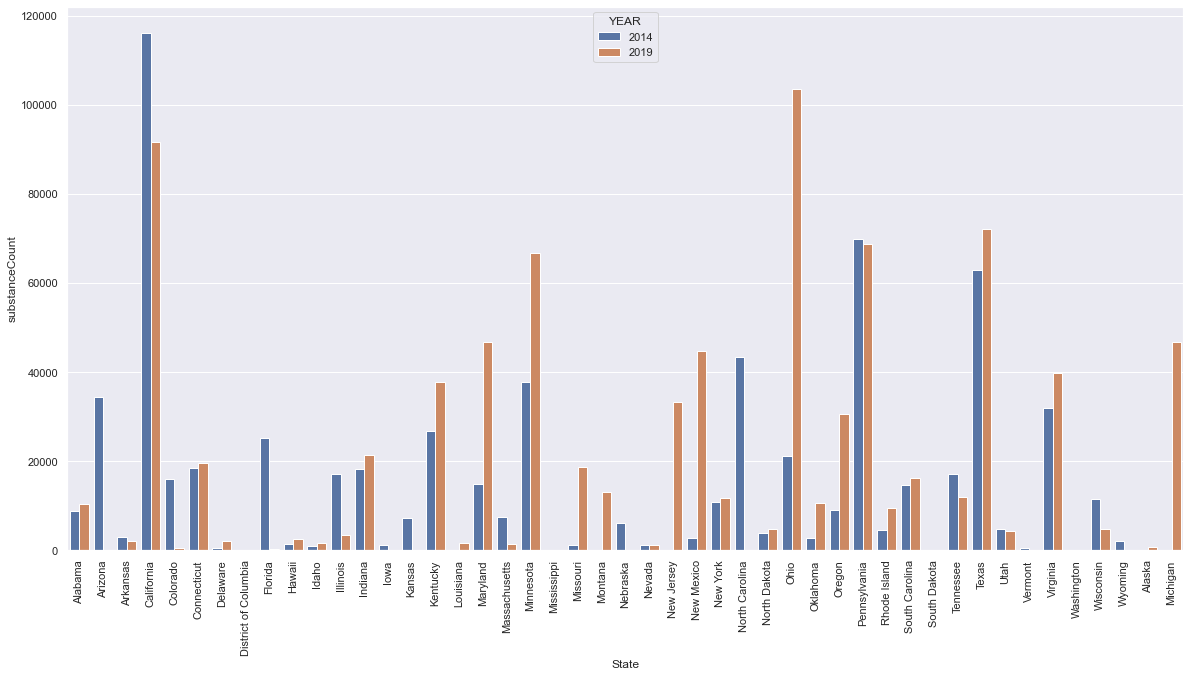

In [127]:
import seaborn as sns
import matplotlib.pyplot as plt

# set plot style: grey grid in the background:
sns.set(style="darkgrid")

# Set the figure size
plt.figure(figsize=(20, 10))

ax = sns.barplot(x = "State", y = "substanceCount", hue = "YEAR", data = summary)
#ax.set_xticklabels('State')

ax.set_xticklabels(ax.get_xticklabels(), rotation = 90)

### Create a similar plot for the number of substance abuse assistance clinics

<Figure size 1440x720 with 0 Axes>

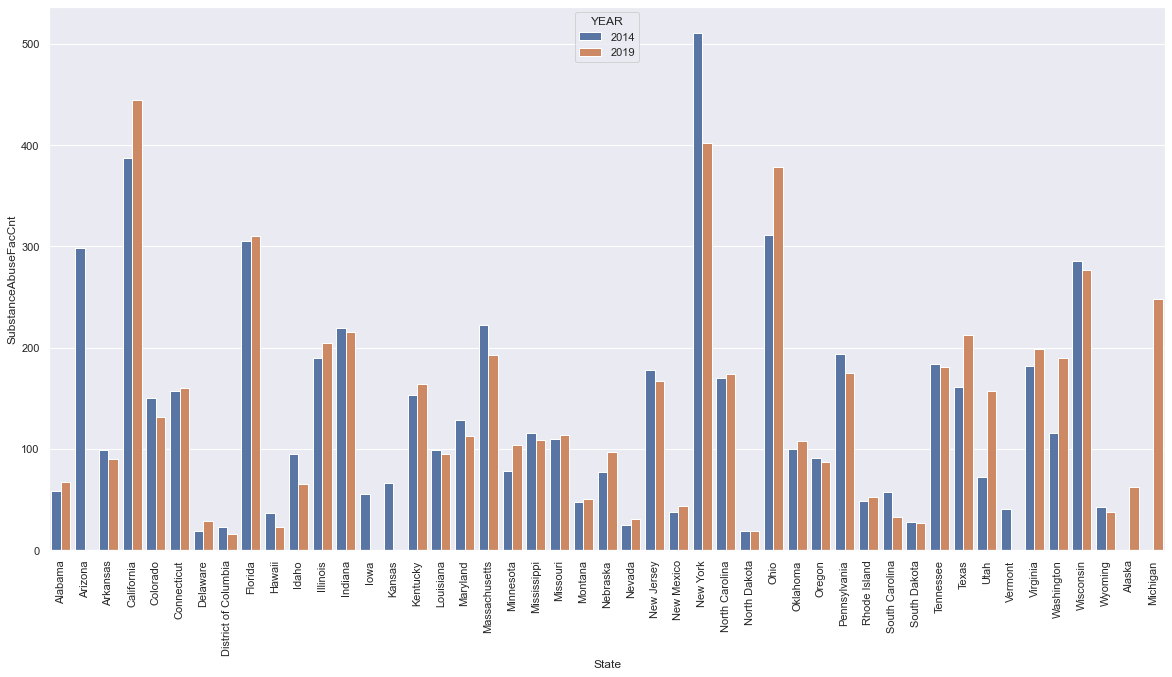

<Figure size 1440x720 with 0 Axes>

In [128]:
import seaborn as sns
import matplotlib.pyplot as plt

# set plot style: grey grid in the background:
sns.set(style="darkgrid")

# Set the figure size
plt.figure(figsize=(20, 10))

ax = sns.barplot(x = "State", y = "SubstanceAbuseFacCnt", hue = "YEAR", data = summary)
#ax.set_xticklabels('State')

ax.set_xticklabels(ax.get_xticklabels(), rotation = 90)
plt.figure(figsize=(20, 10))

### Some observations while studying the substance abuse count and the number of faciities 

* Substance abuse case counts have dropped from 2014 to 2019 especially in states like California, Wisconin and Tennesse, however the number of clinics to help with substance abuse rose sharply in California. However there was a similar drop in the number of clinics in Wisconsin and Tennessee
* There appears to be an overall trend of the number of substance abuse cases between 2014 and 2019 from the first figure
* From the second figure a corresponding rise in the number of clinics is not apparent. 
* In fact in states like Maryland the substance abuse case count went up sharply from 2014 to 2019 but the number of facilities dropped.

#### Plot per state comparing the years 2014 and 2019 wrt Mental Heath Case Count and  Mental Health Assistance Facilities

In [130]:
summary.columns

Index(['YEAR', 'State', 'substanceCount', 'disorderCount',
       'MentalHealthFacCnt', 'SubstanceAbuseFacCnt', 'Population'],
      dtype='object')

[Text(0, 0, 'Alabama'),
 Text(1, 0, 'Arizona'),
 Text(2, 0, 'Arkansas'),
 Text(3, 0, 'California'),
 Text(4, 0, 'Colorado'),
 Text(5, 0, 'Connecticut'),
 Text(6, 0, 'Delaware'),
 Text(7, 0, 'District of Columbia'),
 Text(8, 0, 'Florida'),
 Text(9, 0, 'Hawaii'),
 Text(10, 0, 'Idaho'),
 Text(11, 0, 'Illinois'),
 Text(12, 0, 'Indiana'),
 Text(13, 0, 'Iowa'),
 Text(14, 0, 'Kansas'),
 Text(15, 0, 'Kentucky'),
 Text(16, 0, 'Louisiana'),
 Text(17, 0, 'Maryland'),
 Text(18, 0, 'Massachusetts'),
 Text(19, 0, 'Minnesota'),
 Text(20, 0, 'Mississippi'),
 Text(21, 0, 'Missouri'),
 Text(22, 0, 'Montana'),
 Text(23, 0, 'Nebraska'),
 Text(24, 0, 'Nevada'),
 Text(25, 0, 'New Jersey'),
 Text(26, 0, 'New Mexico'),
 Text(27, 0, 'New York'),
 Text(28, 0, 'North Carolina'),
 Text(29, 0, 'North Dakota'),
 Text(30, 0, 'Ohio'),
 Text(31, 0, 'Oklahoma'),
 Text(32, 0, 'Oregon'),
 Text(33, 0, 'Pennsylvania'),
 Text(34, 0, 'Rhode Island'),
 Text(35, 0, 'South Carolina'),
 Text(36, 0, 'South Dakota'),
 Text(37, 0, 

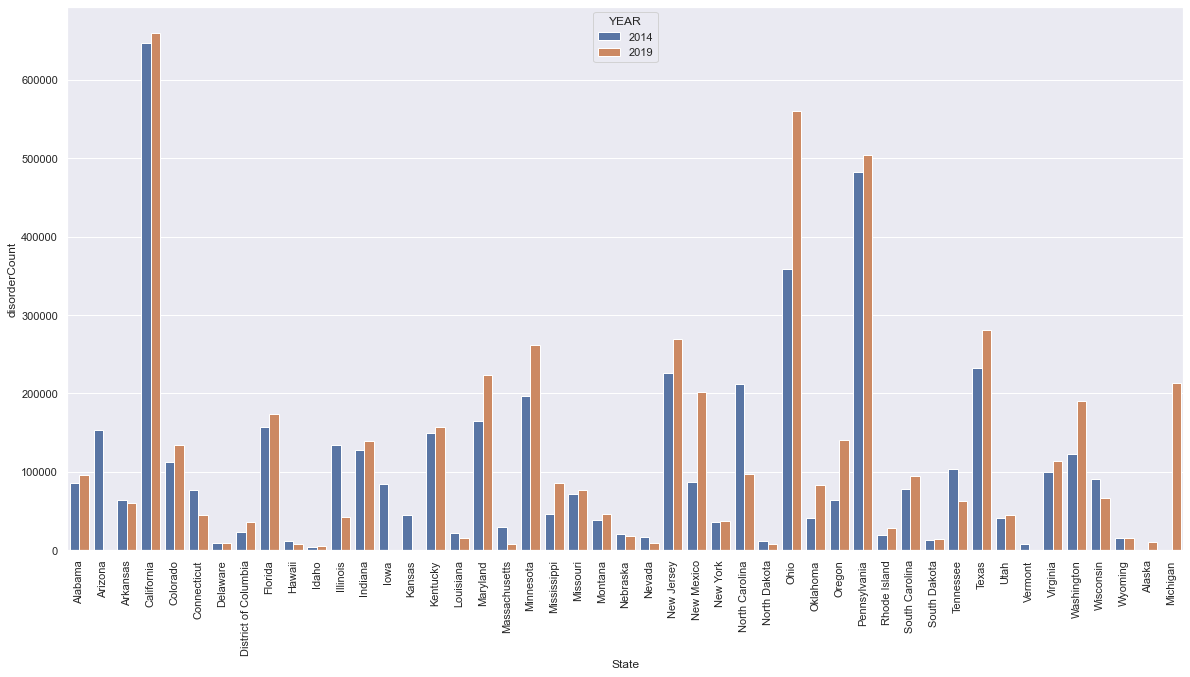

In [139]:
import seaborn as sns
import matplotlib.pyplot as plt# set plot style: grey grid in the background:
sns.set(style="darkgrid")
# Set the figure size
plt.figure(figsize=(20, 10))
ax = sns.barplot(x = "State", y = "disorderCount", hue = "YEAR", data = summary)
ax.set_xticklabels(ax.get_xticklabels(), rotation = 90)

[Text(0, 0, 'Alabama'),
 Text(1, 0, 'Arizona'),
 Text(2, 0, 'Arkansas'),
 Text(3, 0, 'California'),
 Text(4, 0, 'Colorado'),
 Text(5, 0, 'Connecticut'),
 Text(6, 0, 'Delaware'),
 Text(7, 0, 'District of Columbia'),
 Text(8, 0, 'Florida'),
 Text(9, 0, 'Hawaii'),
 Text(10, 0, 'Idaho'),
 Text(11, 0, 'Illinois'),
 Text(12, 0, 'Indiana'),
 Text(13, 0, 'Iowa'),
 Text(14, 0, 'Kansas'),
 Text(15, 0, 'Kentucky'),
 Text(16, 0, 'Louisiana'),
 Text(17, 0, 'Maryland'),
 Text(18, 0, 'Massachusetts'),
 Text(19, 0, 'Minnesota'),
 Text(20, 0, 'Mississippi'),
 Text(21, 0, 'Missouri'),
 Text(22, 0, 'Montana'),
 Text(23, 0, 'Nebraska'),
 Text(24, 0, 'Nevada'),
 Text(25, 0, 'New Jersey'),
 Text(26, 0, 'New Mexico'),
 Text(27, 0, 'New York'),
 Text(28, 0, 'North Carolina'),
 Text(29, 0, 'North Dakota'),
 Text(30, 0, 'Ohio'),
 Text(31, 0, 'Oklahoma'),
 Text(32, 0, 'Oregon'),
 Text(33, 0, 'Pennsylvania'),
 Text(34, 0, 'Rhode Island'),
 Text(35, 0, 'South Carolina'),
 Text(36, 0, 'South Dakota'),
 Text(37, 0, 

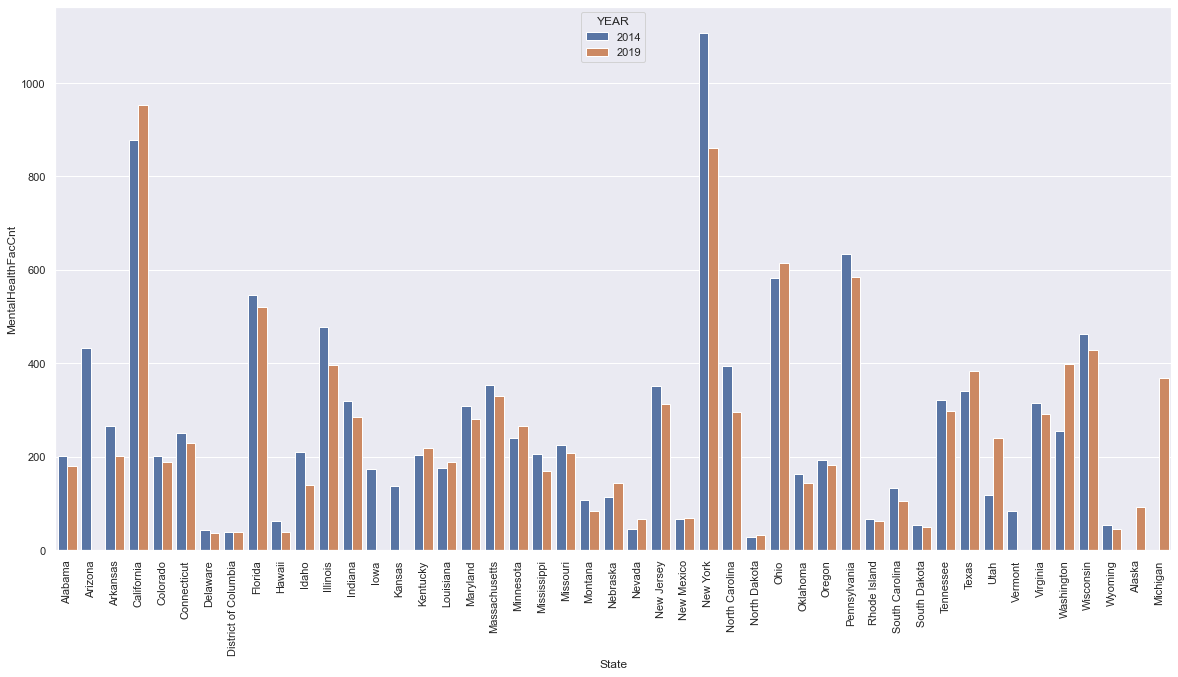

In [145]:
import seaborn as sns
import matplotlib.pyplot as plt# set plot style: grey grid in the background:
sns.set(style="darkgrid")
# Set the figure size
plt.figure(figsize=(20, 10))
ax = sns.barplot(x = "State", y = "MentalHealthFacCnt", hue = "YEAR", data = summary)
ax.set_xticklabels(ax.get_xticklabels(), rotation = 90)

Different in Facility per Capita across States

[Text(0, 0, 'Alabama'),
 Text(1, 0, 'Arizona'),
 Text(2, 0, 'Arkansas'),
 Text(3, 0, 'California'),
 Text(4, 0, 'Colorado'),
 Text(5, 0, 'Connecticut'),
 Text(6, 0, 'Delaware'),
 Text(7, 0, 'District of Columbia'),
 Text(8, 0, 'Florida'),
 Text(9, 0, 'Hawaii'),
 Text(10, 0, 'Idaho'),
 Text(11, 0, 'Illinois'),
 Text(12, 0, 'Indiana'),
 Text(13, 0, 'Iowa'),
 Text(14, 0, 'Kansas'),
 Text(15, 0, 'Kentucky'),
 Text(16, 0, 'Louisiana'),
 Text(17, 0, 'Maryland'),
 Text(18, 0, 'Massachusetts'),
 Text(19, 0, 'Minnesota'),
 Text(20, 0, 'Mississippi'),
 Text(21, 0, 'Missouri'),
 Text(22, 0, 'Montana'),
 Text(23, 0, 'Nebraska'),
 Text(24, 0, 'Nevada'),
 Text(25, 0, 'New Jersey'),
 Text(26, 0, 'New Mexico'),
 Text(27, 0, 'New York'),
 Text(28, 0, 'North Carolina'),
 Text(29, 0, 'North Dakota'),
 Text(30, 0, 'Ohio'),
 Text(31, 0, 'Oklahoma'),
 Text(32, 0, 'Oregon'),
 Text(33, 0, 'Pennsylvania'),
 Text(34, 0, 'Rhode Island'),
 Text(35, 0, 'South Carolina'),
 Text(36, 0, 'South Dakota'),
 Text(37, 0, 

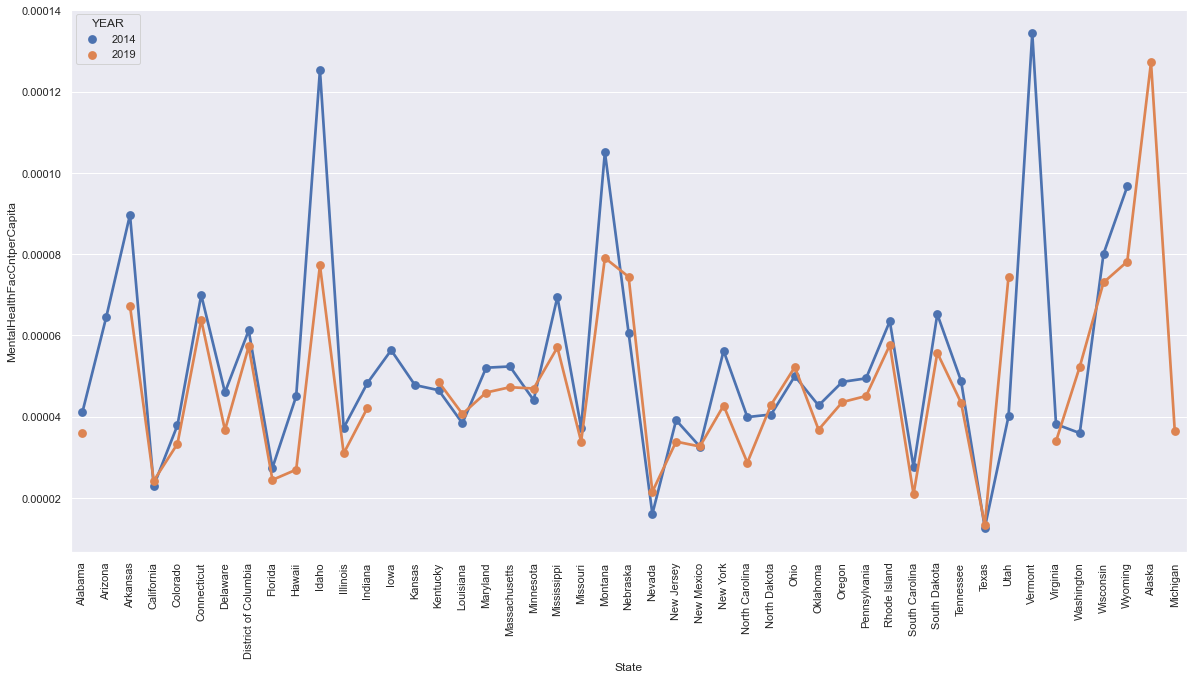

In [150]:
import seaborn as sns
import matplotlib.pyplot as plt# set plot style: grey grid in the background:
sns.set(style="darkgrid")
# Set the figure size
plt.figure(figsize=(20, 10))
ax = sns.pointplot(x = "State", y = "MentalHealthFacCntperCapita",hue = "YEAR",  data = summary)
ax.set_xticklabels(ax.get_xticklabels(), rotation = 90)

### Some observations while studying the mental health disorder count and the number of mental health assistance facilities

* Mental health  case counts have overall increased from 2014 to 2019 especially in states like Ohio, Maryland, Minnesota, New Jersey, Mississippi
* while the cases went up the number of facilities in Maryland, Mississipi went down
* Encouraging to see the number of facilities was increased in Ohio by an amount to likely match the requirement of increased mental health cases.
* There seems to be an overall drop in the number of mental health facilities in 2019 compared to 2014. 
* The above point seems confirmed by the plot showing the # Facility / Capita seems to be lower in 2019 vs 2014.

As a final step, lets do a pairplot to see if there is any correlation

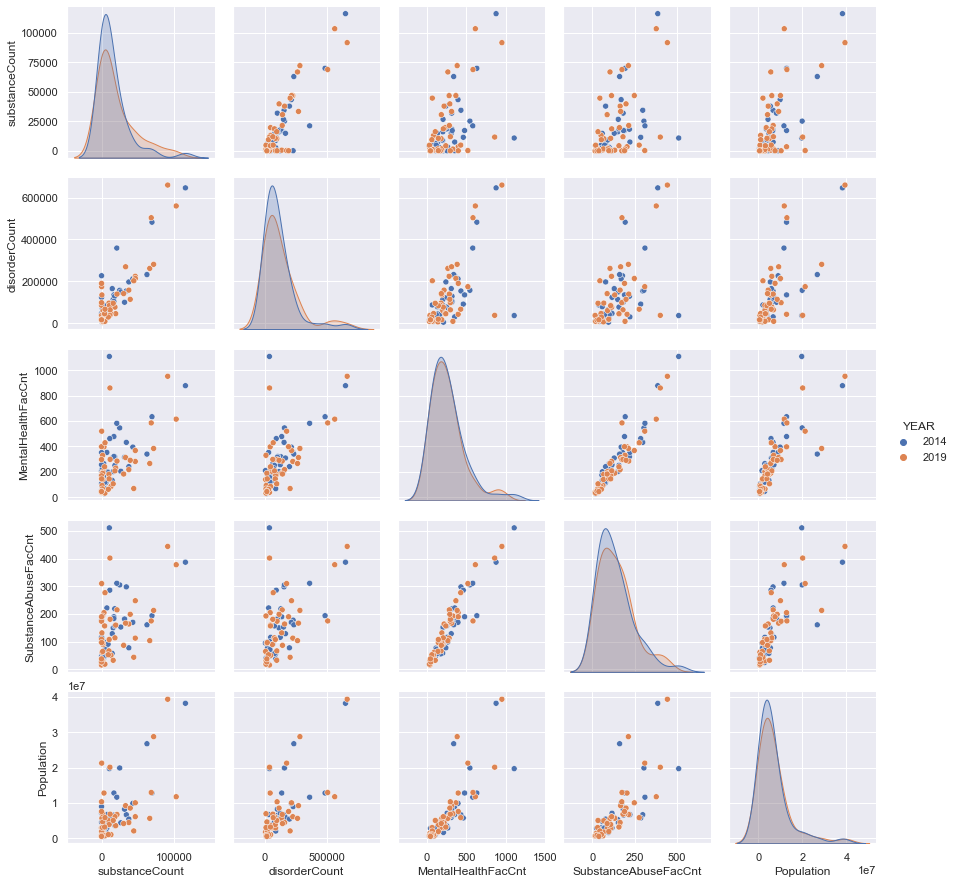

In [141]:
sns.pairplot(summary, hue="YEAR")

### Some observations while studying the mental health disorder count and the number of mental health assistance facilities
Overall the patterns between 2014 and 2019 don't differ in any visually significant manner. 2014 appears to have a higher peak in both substance abuse and mental health case counts. 

## Overall summary
The goal of this exercise was to study whether the facilities reported by SAMHSA were enough to support the changing needs of substance abuse and mental health case reports from 2014 to 2019. Especially given the media attention to "rising" mental health concerns, this data does not seem indicate that. Along the way this study also attempted to see if there was a correlation between mental health cases and susbtance abuse cases.

It could also mean a few different things 
* that the data reported by SAMHSA does not represent reality 
* that the rising need of help is address by facilities that are growing outside of SAMHSA's perview.
* cases are not tracked consistently between 2014 and 2019

Additional data appears to be required to analyse if the SAMHSA data is truly accurate.
When data becomes available, it would be interesting to apply the same study to understand the difference between 2019 and 2022

Some redflags that need further analysis
* Substance abuse case counts have dropped from 2014 to 2019 especially in states like California, Wisconin and Tennesse, however the number of clinics to help with substance abuse rose sharply in California. However there was a similar drop in the number of clinics in Wisconsin and Tennessee
* There appears to be an overall trend of the number of substance abuse cases between 2014 and 2019 from the first figure
* From the second figure a corresponding rise in the number of clinics is not apparent. 
* In fact in states like Maryland the substance abuse case count went up sharply from 2014 to 2019 but the number of facilities dropped.
* Mental health  case counts have overall increased from 2014 to 2019 especially in states like Ohio, Maryland, Minnesota, New Jersey, Mississippi
* while the cases went up the number of facilities in Maryland, Mississipi went down
* Encouraging to see the number of facilities was increased in Ohio by an amount to likely match the requirement of increased mental health cases.
* There seems to be an overall drop in the number of mental health facilities in 2019 compared to 2014. 


Overall, given the attention to mental health, the data does not show increased facilities (~increased spend) on mental health facilities. This seems to be a problem that needs attention.
